In [1]:
import pandas as pd

# Load the CSV file
file_path = "Reports/Direct_Attempt/direct_attempt.csv"
check_report = pd.read_csv(file_path)

check_report = check_report[~((check_report["Day"] == 25) & (check_report["Part"] == "Part 2"))]

# Display the first few rows of the dataframe
check_report.head(50)

,Day,Part,Language,Attempt,Output,Expected Output,Status,Error Message,Execution Time (s),Date/Time
0,1,Part 1,C,initial_attempt,1646452,1646452,CORRECT,NaN,0.192,2025-05-11 17:03:43
1,1,Part 2,C,initial_attempt,23609874,23609874,CORRECT,NaN,0.347,2025-05-11 17:03:43
2,1,Part 1,Python,initial_attempt,1646452,1646452,CORRECT,NaN,0.007,2025-05-11 17:03:43
3,1,Part 2,Python,initial_attempt,23609874,23609874,CORRECT,NaN,0.008,2025-05-11 17:03:43
4,1,Part 1,Clojure,initial_attempt,1646452,1646452,CORRECT,NaN,0.616,2025-05-11 17:03:44
5,1,Part 2,Clojure,initial_attempt,23609874,23609874,CORRECT,NaN,0.615,2025-05-11 17:03:44
6,2,Part 1,C,initial_attempt,277,524,INCORRECT,NaN,0.095,2025-05-11 17:03:44
7,2,Part 2,C,initial_attempt,299,569,INCORRECT,NaN,0.172,2025-05-11 17:03:44
8,2,Part 1,Python,initial_attempt,524,524,CORRECT,NaN,0.009,2025-05-11 17:03:44
9,2,Part 2,Python,initial_attempt,569,569,CORRECT,NaN,0.011,2025-05-11 17:03:44


/tmp/ipykernel_142467/3544456338.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_matrix = pivot_df.replace(status_codes)


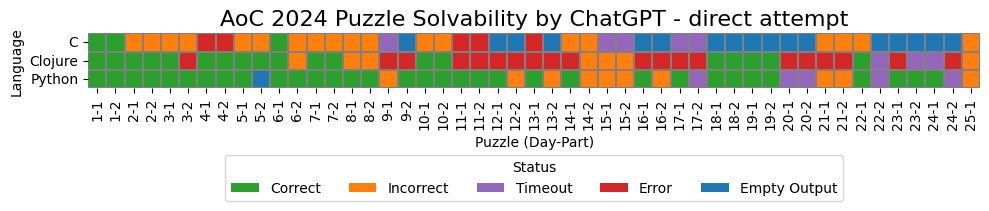

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Load your data
df = check_report

# Combine Day and Part to a single 'Day-Part' column
df["Day-Part"] = df["Day"].astype(str) + "-" + df["Part"].str.extract(r'(\d+)')[0]
# Sort the columns in the desired order

# Bundle 'ERROR' and 'RUNTIME_ERROR' statuses
df["Status"] = df["Status"].replace("RUNTIME_ERROR", "ERROR")

# Pivot table: Languages as rows, Day-Part as columns, Status as cell value
pivot_df = df.pivot(index="Language", columns="Day-Part", values="Status")
sorted_columns = sorted(pivot_df.columns, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
pivot_df = pivot_df[sorted_columns]

# Define all known statuses and assign colors
status_order = [
    "CORRECT",
    "INCORRECT",
    "TIMEOUT",
    "ERROR",
    "EMPTY_OUTPUT",
]

color_palette = {
    "CORRECT": "#2ca02c",            # green
    "INCORRECT": "#ff7f0e",          # orange
    "TIMEOUT": "#9467bd",            # purple
    "ERROR": "#d62728",              # red (bundled ERROR and RUNTIME_ERROR)
    "EMPTY_OUTPUT": "#1f77b4",       # blue
}

# Map each status to a number
status_codes = {status: i for i, status in enumerate(status_order)}
numeric_matrix = pivot_df.replace(status_codes)

# Create colormap
colors = [color_palette[status] for status in status_order]
cmap = sns.color_palette(colors)

# Plotting
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_matrix, cmap=cmap, cbar=False, linewidths=0.3, linecolor='gray',
            square=True, xticklabels=True, yticklabels=True)

plt.title("AoC 2024 Puzzle Solvability by ChatGPT - direct attempt", fontsize=16)
plt.xlabel("Puzzle (Day-Part)")
plt.ylabel("Language")

# Legend
legend_elements = [Patch(facecolor=color_palette[status], label=status.replace("_", " ").title())
                   for status in status_order]
plt.legend(handles=legend_elements, title="Status", bbox_to_anchor=(0.5, -1.1), loc='upper center', ncol=5)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

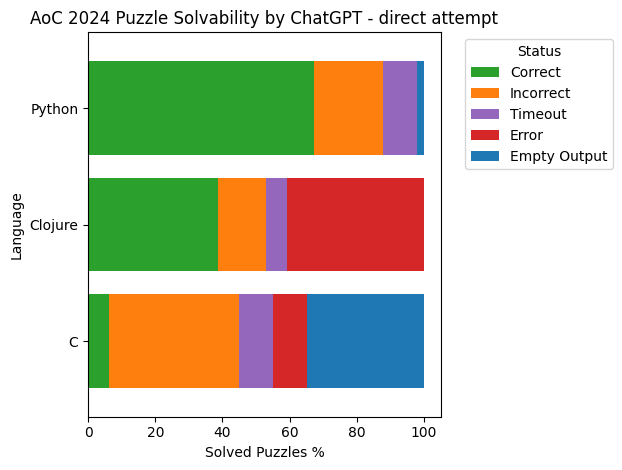

In [3]:
# Aggregate data for the graph
status_counts = df.groupby("Language")["Status"].value_counts(normalize=True).unstack(fill_value=0) * 100
status_counts = status_counts[status_order]  # Ensure the order of statuses matches the defined order

# Define colors for the statuses
colors = [color_palette[status] for status in status_order]

# Plot the stacked horizontal bar chart
plt.figure(figsize=(12, 8))
status_counts.plot(kind="barh", stacked=True, color=colors, width=0.8)

# Add labels and title
plt.xlabel("Solved Puzzles %")
plt.ylabel("Language")
plt.title("AoC 2024 Puzzle Solvability by ChatGPT - direct attempt", fontsize=12)

# Add legend
legend_elements = [Patch(facecolor=color_palette[status], label=status.replace("_", " ").title()) for status in status_order]
plt.legend(handles=legend_elements, title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [4]:
pivot_df.head(50)

Day-Part,1-1,1-2,2-1,2-2,3-1,3-2,4-1,4-2,5-1,5-2,...,20-2,21-1,21-2,22-1,22-2,23-1,23-2,24-1,24-2,25-1
Language,,,,,,,,,,,,,,,,,,,,,
C,CORRECT,CORRECT,INCORRECT,INCORRECT,INCORRECT,INCORRECT,ERROR,ERROR,INCORRECT,INCORRECT,...,EMPTY_OUTPUT,INCORRECT,INCORRECT,INCORRECT,EMPTY_OUTPUT,EMPTY_OUTPUT,EMPTY_OUTPUT,EMPTY_OUTPUT,EMPTY_OUTPUT,INCORRECT
Clojure,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,ERROR,CORRECT,CORRECT,CORRECT,CORRECT,...,ERROR,ERROR,ERROR,CORRECT,TIMEOUT,ERROR,TIMEOUT,TIMEOUT,ERROR,INCORRECT
Python,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,CORRECT,EMPTY_OUTPUT,...,TIMEOUT,INCORRECT,INCORRECT,CORRECT,TIMEOUT,CORRECT,CORRECT,CORRECT,TIMEOUT,INCORRECT
